# ****Does Disneyland Make People Happy?****

**PARTS:**
* Data Cleaning
* Text Processing
* EDA
* Sentiment Analysis
* Model Comparison

In [1]:
import numpy as np 
import pandas as pd

## 1) Data Cleaning ##

In [2]:
url='/kaggle/input/disneyland-reviews/DisneylandReviews.csv'
df=pd.read_csv(url, encoding='latin-1')
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [4]:
# drop rows with missing 'Year_Month' value
df = df[df["Year_Month"].str.contains("missing") == False]
df.shape

(40043, 6)

In [5]:
# check for potential duplicates
df["Review_ID"].value_counts().head(21)

121570980    2
121615246    2
121586148    2
121580686    2
121578357    2
166787635    2
121568004    2
226905150    2
168489234    2
166787525    2
166784597    2
166754595    2
166753649    2
166730734    2
121615136    2
129231609    2
129214104    2
129207323    2
164862064    2
164830205    2
122162976    1
Name: Review_ID, dtype: int64

In [6]:
# random pick ID and check whether the reviews are exactly the same
df[df["Review_ID"] == 121615136]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
9173,121615136,5,2011-12,Singapore,"What's there not to like about Disneyland, esp...",Disneyland_HongKong
9183,121615136,5,2011-12,Singapore,"What's there not to like about Disneyland, esp...",Disneyland_HongKong


In [7]:
# check one more
df[df["Review_ID"] == 164862064]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
7939,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong
7949,164862064,5,2013-6,Singapore,Great atmosphere... A place for everyone in th...,Disneyland_HongKong


In [8]:
# drop duplicate values
df = df.drop_duplicates(subset='Review_ID', keep='first',ignore_index=True)
df.shape

(40023, 6)

In [9]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
40018,92198076,4,2011-1,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris
40019,92061774,4,2011-1,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris
40020,91995748,1,2010-12,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris
40021,91984642,2,2010-12,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris


In [10]:
df["Year_Month"]

0         2019-4
1         2019-5
2         2019-4
3         2019-4
4         2019-4
          ...   
40018     2011-1
40019     2011-1
40020    2010-12
40021    2010-12
40022     2010-9
Name: Year_Month, Length: 40023, dtype: object

In [11]:
# split year and month for time series analysis
new_val = df["Year_Month"].str.split("-", n = 1,expand = True)
new_val.rename(columns = {0:'year', 1:'month'}, inplace = True)
new_val

,year,month
0,2019,4
1,2019,5
2,2019,4
3,2019,4
4,2019,4
...,...,...
40018,2011,1
40019,2011,1
40020,2010,12
40021,2010,12


In [12]:
# creating new columns for the updated attributes
df = pd.concat([df, new_val], axis=1)

# Dropping old feature  
df.drop("Year_Month", axis=1, inplace=True)
df

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,year,month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4
...,...,...,...,...,...,...,...
40018,92198076,4,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris,2011,1
40019,92061774,4,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris,2011,1
40020,91995748,1,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris,2010,12
40021,91984642,2,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris,2010,12


In [13]:
df.describe()

,Review_ID,Rating
count,4.002300e+04,40023.000000
mean,3.322275e+08,4.231092
std,1.605428e+08,1.052061
min,9.161911e+07,1.000000
25%,1.864012e+08,4.000000
50%,3.076667e+08,5.000000
75%,4.605411e+08,5.000000
max,6.708014e+08,5.000000


*cannot really construe yet whether Disneyland reviews are generally positive*

# 2) Text Preprocessing

In [14]:
!pip install textblob
!pip install nltk 

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [15]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import nltk

In [16]:
# text preprocessing(preparing for sentiment analysis)

# removing numerical values
df["cleaned_text"] = df["Review_Text"].str.replace("\d","", regex=True)

# removing punctuation
df["cleaned_text"] = df["Review_Text"].str.replace("[^\w\s]","", regex=True)

#convert to lowecase
df["cleaned_text"] = df["cleaned_text"].str.lower()

In [17]:
# get word count for EDA
df["review_length"] = df['cleaned_text'].str.count(' ') + 1

In [18]:
df

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,year,month,cleaned_text,review_length
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,if youve ever been to disneyland anywhere youl...,62
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,its been a while since d last time we visit hk...,171
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god it wasn t too hot or too humid wh...,179
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland is a great compact park unfortun...,91
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,the location is not in the city took around 1 ...,33
...,...,...,...,...,...,...,...,...,...
40018,92198076,4,United Kingdom,Although our pick up was prompt the taxi drive...,Disneyland_Paris,2011,1,although our pick up was prompt the taxi drive...,316
40019,92061774,4,Germany,Just returned from a 4 days family trip to Dis...,Disneyland_Paris,2011,1,just returned from a 4 days family trip to dis...,653
40020,91995748,1,United Kingdom,We spent the 20 Dec 2010 in the Disney park an...,Disneyland_Paris,2010,12,we spent the 20 dec 2010 in the disney park an...,442
40021,91984642,2,United Kingdom,Well I was really looking forward to this trip...,Disneyland_Paris,2010,12,well i was really looking forward to this trip...,314


In [19]:
# removing stop words
nltk.download("stopwords")

from nltk.corpus import stopwords
sw = stopwords.words("english")
df["cleaned_text"] = df["cleaned_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# lemmatization

nltk.download("wordnet")
nltk.download("omw-1.4")
df["cleaned_text"] = df["cleaned_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [22]:
# true review classification for accuracy analysis

true_sentiment = []
for i in range(len(df)):
    if df['Rating'][i] > 3:
        true_sentiment.append('positive')
    elif df['Rating'][i] < 3:
        true_sentiment.append('negative')
    else:
        true_sentiment.append('neutral')

df['true_sentiment'] = true_sentiment

## 3) Exploratory Data Analysis (EDA)

In [23]:
!pip install natsort

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

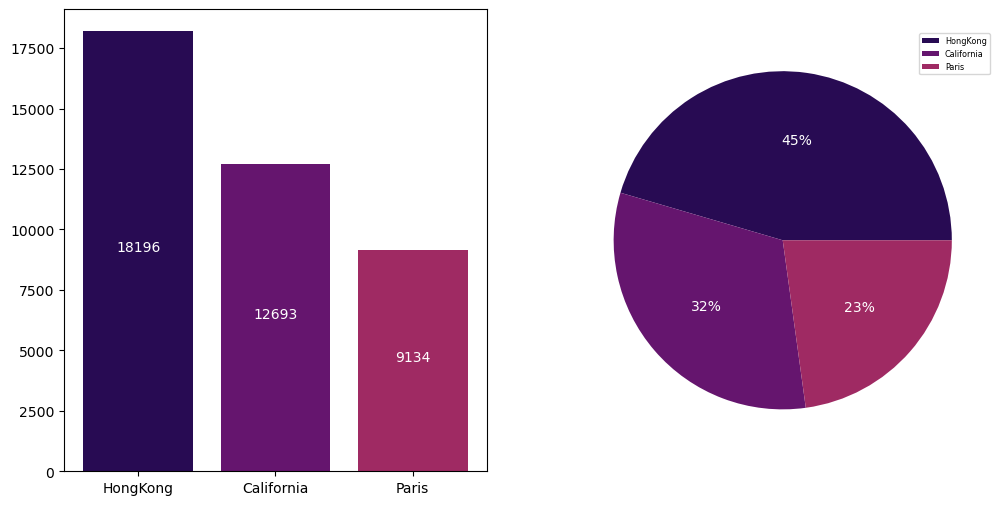

In [25]:
# number of reviews per branch
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#define Seaborn color palette to use
colors = sns.color_palette('inferno')[0:3]

# set parameters
x = [branch[11:] for branch in df["Branch"].unique()]
y = df["Branch"].value_counts().values

# create pie chart
ax[1].pie(x=y, labels = x, colors = colors, autopct='%.0f%%',textprops=dict(color='white'))
ax[1].legend(labels=x, loc='upper right', fontsize="xx-small")

# create bar chart
ax[0].bar(x, y, color=colors)
for x , y, col in zip(x, y, colors):
    ax[0].text(x, y/2, y,ha='center',color='white')

plt.show()

**Discussion** \
Huge difference in number of reviews might cause bias in the data analysis. In this case, the data sample are huge and the difference does not exceed 25%, thus, it would be save to say the further analysis would be relatively accurate.

Furthermore, the reason for difference in number of review might be caused by:
1) more visitors \
2) different times of the park's initial opening \
3) data collection method (e.g. Disneyland HongKong might have easier access for reviews)

<AxesSubplot:xlabel='year', ylabel='count'>

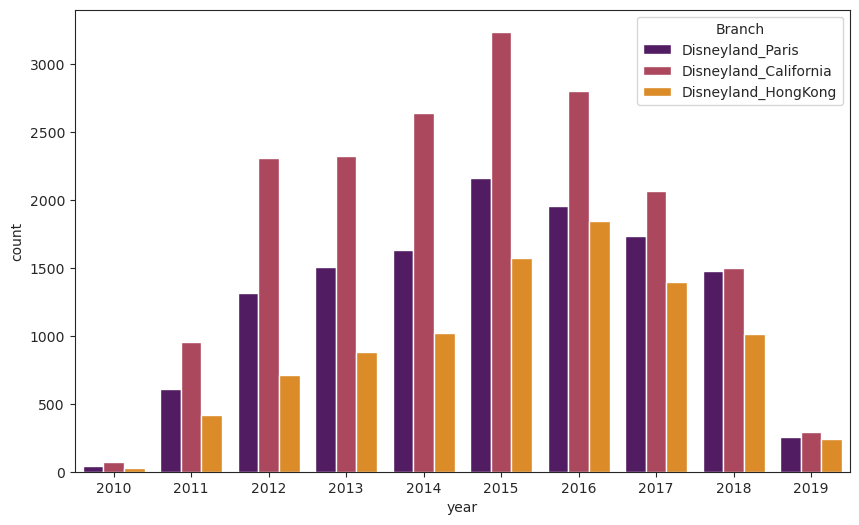

In [26]:
# number of people visit each brand accross different years
sorted_year = df.sort_values(by=['year'], ascending=True, inplace=False, kind='quicksort', ignore_index=True)
plt.figure(figsize=(10,6))
sns.set_style("ticks")
sns.countplot(data=sorted_year,x='year',hue='Branch',palette='inferno')

**Discussion** \
Peak year for Disneyland Paris and California are both in 2015\
However, Disneyland Hongkong shows peak in 2016 instead.
This difference might be due to some possible reasons:
1) surge in tourist traffic (e.g. HongKong might be a popular travel destination in 2016) \
2) new attractions \
3) promos

In [27]:
# prepare data
from natsort import index_natsorted

distinct_branch = [branch for branch in df["Branch"].unique()]
total_visitor = {}

for branch in distinct_branch:
    temp = df.loc[df['Branch'] == branch]
    temp = temp.sort_values(by="month",key=lambda x: np.argsort(index_natsorted(temp["month"])))
    total_visitor[branch] = temp.groupby(temp['month'], sort=False)['month'].count().values

total_visitor

{'Disneyland_HongKong': array([ 743,  505,  760,  851,  773,  778,  690,  606,  645,  859,  791,
        1133]),
 'Disneyland_California': array([1189, 1107, 1451, 1482, 1566, 1646, 1838, 1688, 1602, 1776, 1179,
        1672]),
 'Disneyland_Paris': array([ 583,  847,  921, 1143, 1097, 1164, 1348, 1700,  982, 1129,  714,
        1065])}

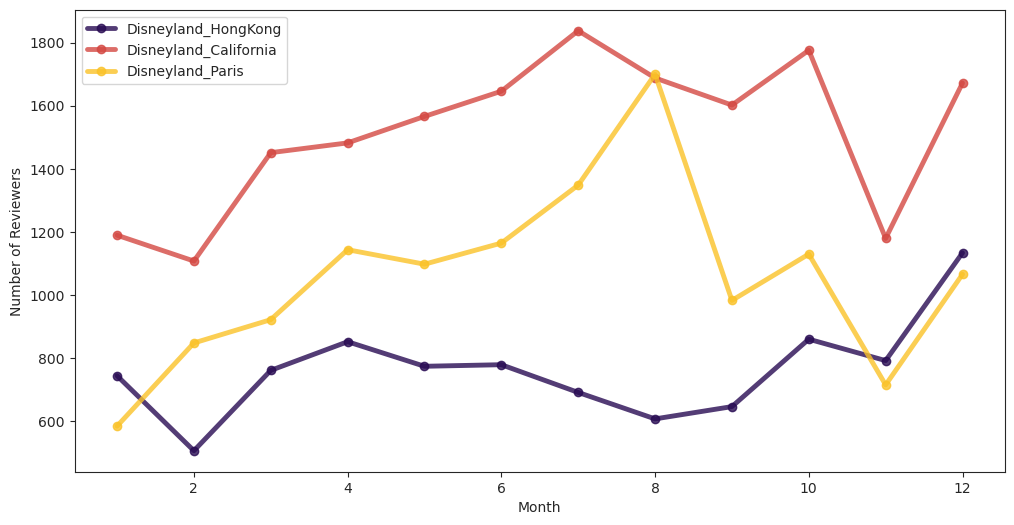

In [28]:
# peak month of Disneyland visit in each branch
plt.figure(figsize=(12,6))
colors = [sns.color_palette('inferno')[0],sns.color_palette('inferno')[3], sns.color_palette('inferno')[5]]

x = [i for i in range(1,13,1)]
count = 0
for branch in distinct_branch:
    y = total_visitor[branch]
    plt.plot(x,y,color=colors[count],marker='o', label=branch, linewidth = 3.5, alpha=0.8) 
    count += 1
plt.xlabel("Month")
plt.ylabel("Number of Reviewers")
plt.legend()

**Discussion** \
the different in month peak might be due to:
1) different wheather/season in each area \
2) different holiday season (usually crowded during school breaks) \
3) special events (e.g. CNY, more visitor at Disneyland HK)

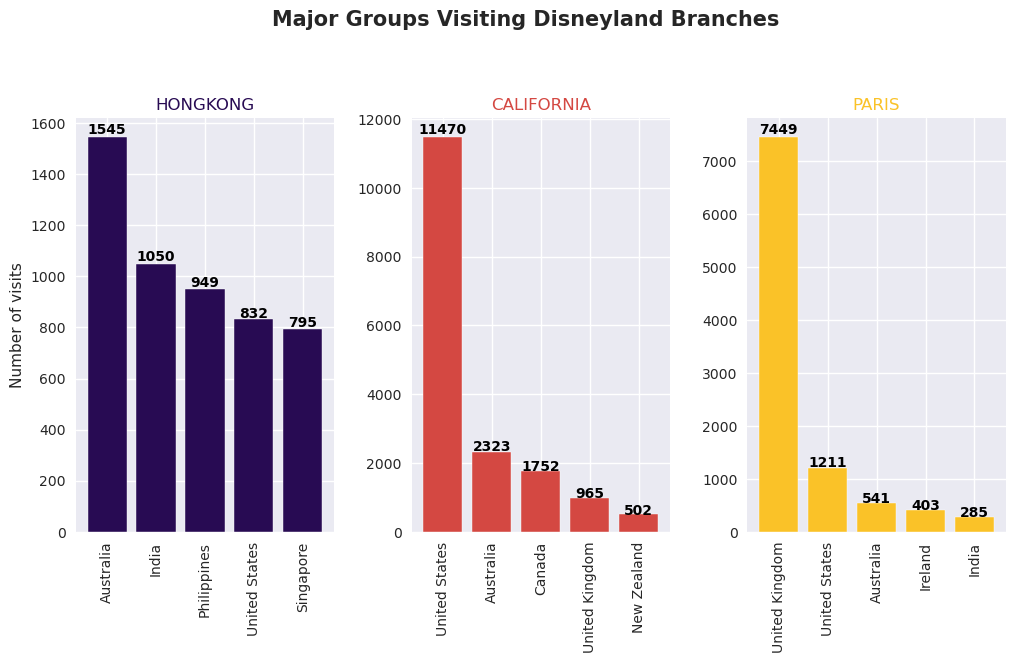

In [29]:
# distribution of visitor accross each branch
colors = [sns.color_palette('inferno')[0],sns.color_palette('inferno')[3], sns.color_palette('inferno')[5]]

with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, 3, figsize=(12, 6))
    plt.subplots_adjust(top=0.8, wspace=0.3)
    for i, (branch, col) in enumerate(zip(df.Branch.unique(), colors)):
        # count the reviews for a particular disneyland branch
        loc_count = df[df.Branch == branch]['Reviewer_Location'].value_counts()[:5]
        # plot
        x = loc_count.index
        y = loc_count.values
        ax[i].bar(x, y, color=col)
        ax[0].set_ylabel('Number of visits')
        ax[i].set_title(branch.upper()[11:], color=col)
        ax[i].tick_params(axis='x', rotation=90)
        for c, val in zip(x, y):
            ax[i].text(c, val*1.01, val, ha='center', color='black',weight='semibold')
    fig.suptitle('Major Groups Visiting Disneyland Branches', 
                     fontsize=15, fontweight='semibold')
    fig.show()

**Discussion** \
Distribution due to geographicla location (nearer).\
However, significant amount of US people are visiting Disneyland HongKong even though they are nearer to California.

The reason might be due to:
1) more prefarable rides \
2) an addition to their travel itinerary (travel to the country so might as well go to Disneyland) \
3) price (cheaper in other Disneyland)

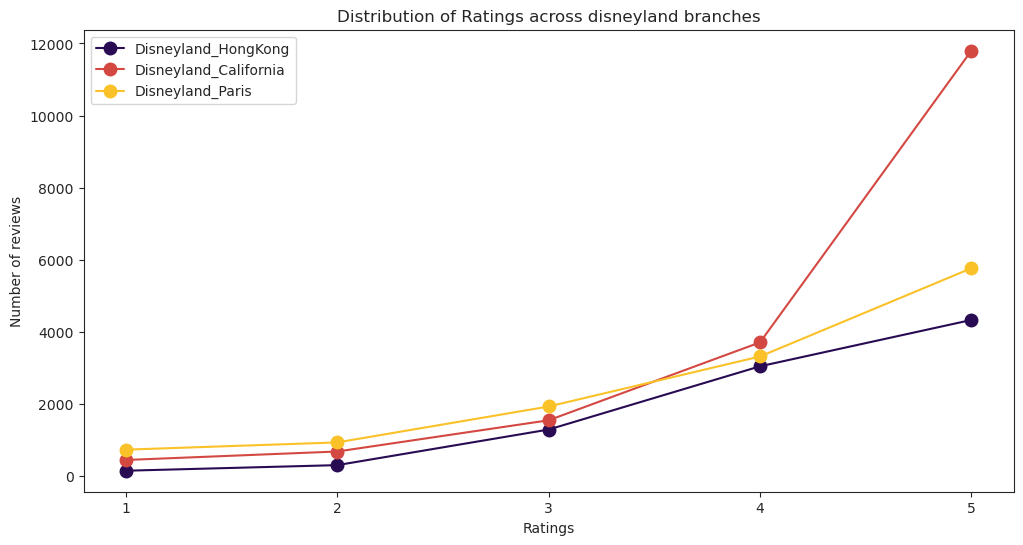

In [30]:
# distribution of ratings accross each branch
colors = [sns.color_palette('inferno')[0],sns.color_palette('inferno')[3], sns.color_palette('inferno')[5]]

plt.figure(figsize=(12, 6))
for branch, col in zip(df.Branch.unique(), colors):
    counts = df[df.Branch == branch]['Rating'].value_counts()
    x = counts.index
    y = counts.values
    plt.plot(x, y, marker='o', markersize=9, color=col, label=branch)
    plt.xticks(np.arange(1, 6))
    plt.xlabel('Ratings')
    plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings Across Disneyland Branches')
plt.legend()
plt.show()

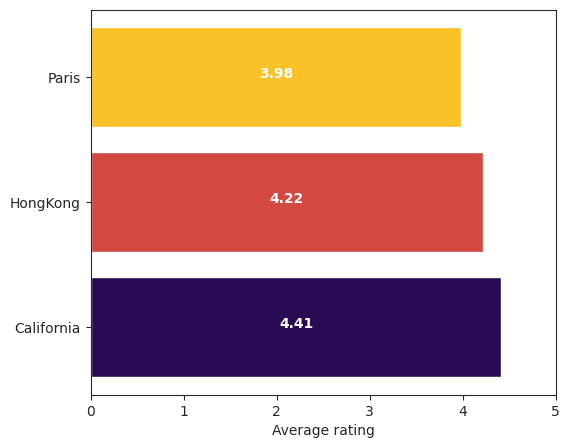

In [31]:
# average ratings in each branch
colors = [sns.color_palette('inferno')[0],sns.color_palette('inferno')[3], sns.color_palette('inferno')[5]]
branch_ratings = df.groupby('Branch').agg({'Rating': 'mean'}).unstack()['Rating']
plt.figure(figsize=(6, 5))
plt.barh([branch[11:] for branch in branch_ratings.index], 
         branch_ratings.values, 
         color=colors)
for val, p in zip(branch_ratings.values, [branch[11:] for branch in branch_ratings.index]):
    plt.text(val/2, p, round(val, 2), color='white', ha='center', weight='semibold')
plt.xlabel('Average Rating')
plt.xticks(np.arange(0, 6))
plt.show()

**Discussion**\
Generally, Disneyland have good review.\
However, average review in Paris is relatively lower, this might be due to:
1) unpredictable situation (rides maintenance -> close) \
2) less prefarable rides\
3) accessibility (e.g. located far from city center) \
4) price (generally, european countries are more expensive)

In [32]:
# visitors distribution who give highest ratings
temp2 = df.groupby(['Reviewer_Location'],as_index=False).agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False).head(10)
temp2.style.background_gradient(cmap="inferno", subset=['Rating'])

,Reviewer_Location,Rating
81,Libya,5.000000
23,Caribbean Netherlands,5.000000
31,Cuba,5.000000
32,Curaçao,5.000000
43,Ethiopia,5.000000
44,Falkland Islands (Islas Malvinas),5.000000
49,Georgia,5.000000
54,Grenada,5.000000
66,Iraq,5.000000
89,Mali,5.000000


In [33]:
# visitors distribution who give lowest ratings
temp2 = df.groupby(['Reviewer_Location'],as_index=False).agg({'Rating':'mean'}).sort_values(by='Rating', ascending=True).head(10)
temp2.style.background_gradient(cmap="inferno", subset=['Rating'])

,Reviewer_Location,Rating
3,Andorra,2.000000
147,Turks and Caicos Islands,2.000000
132,South Sudan,2.000000
136,Suriname,2.000000
39,Ecuador,2.333333
58,Haiti,3.000000
129,Solomon Islands,3.000000
107,Northern Mariana Islands,3.000000
36,Democratic Republic of the Congo,3.000000
128,Slovenia,3.000000


**Discussion**\
What causes this low reviews?
1) *for further analysis*: how many reviews are from the same country (are the figures representative?) \
2) if it is, why are they giving bad reviews? Is there any discrimination against those visitor groups?

**Potential Applications/Actions** \
* **General Business Decision**\
1) does these reviews imply better business? does good/many reviews mean more visitors/more people buying annual pass? \
2) what can be improved? look through some negative feedbacks, analyse common concern and act accordingly \
3) compare to other branches, what they did better than us? what can we implement from what we learn from their strategy/services?\
4) what are the correlation between reviews and other variables (weather/month, promos, rides, special event/attractions, merchandise)

* **Marketing Decision**\
1) when should we issue promo codes/vouchers? \
2) how should we spread review forms for better future data-driven decision? \
3) gather more data (e.g. is a certain promo at a certain period of time does bring more visitors/positive reviews)

# 4) Sentiment Analysis

### Model 1: NLTK Vader
Does not take into acount the relationship between words\

In [34]:
df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,year,month,cleaned_text,review_length,true_sentiment
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,youve ever disneyland anywhere youll find disn...,62,positive
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit hk disneyland yet time s...,171,positive
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...,179,positive
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland great compact park unfortunately...,91,positive
4,670607296,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around 1 hour kowlon kids l...,33,positive


In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [36]:
example = "If youve ever Disneyland anywhere youll find Disneyland Hong Kong similar layout walk main street It familiar feel One rides Small World absolutely fabulous worth The day visited fairly hot relatively busy queues moved fairly well"

In [37]:
# check
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [38]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [39]:
def vader_score(text):
    text = text[:2500] # make it consistent accross all 3 models
    result = sia.polarity_scores(text)
    scores = list(result.values())
    pred_check = scores[:3]

    for i in range(len(pred_check)):
        if pred_check[i] == max(pred_check):
            if i == 0:
                vader_pred = 'negative'
            if i == 1:
                vader_pred = 'neutral'
            if i == 2:
                vader_pred = 'positive'
            
    scores_dict = {
    'vader_neg' : scores[0],
    'vader_neu' : scores[1],
    'vader_pos' : scores[2],
    'compound'  : scores[3],
    'vader_pred': vader_pred 
    }

    return scores_dict

In [40]:
# run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['cleaned_text']
    myid = row['Review_ID']
    res[myid] = vader_score(text)

  0%|          | 0/40023 [00:00<?, ?it/s]

In [41]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Review_ID'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Review_ID,vader_neg,vader_neu,vader_pos,compound,vader_pred,Rating,Reviewer_Location,Review_Text,Branch,year,month,cleaned_text,review_length,true_sentiment
0,670772142,0.0,0.79,0.21,0.7889,neutral,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,youve ever disneyland anywhere youll find disn...,62,positive
1,670682799,0.029,0.678,0.293,0.9851,neutral,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit hk disneyland yet time s...,171,positive
2,670623270,0.022,0.641,0.337,0.9859,neutral,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...,179,positive
3,670607911,0.102,0.628,0.271,0.8739,neutral,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland great compact park unfortunately...,91,positive
4,670607296,0.0,0.777,0.223,0.5106,neutral,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around 1 hour kowlon kids l...,33,positive


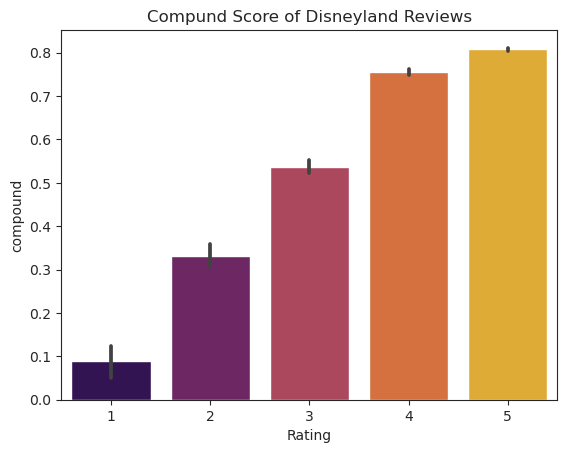

In [42]:
# plot vader results
ax = sns.barplot(data=vaders, x='Rating', y='compound',palette='inferno')
ax.set_title('Compund Score of Disneyland Reviews')
plt.show()

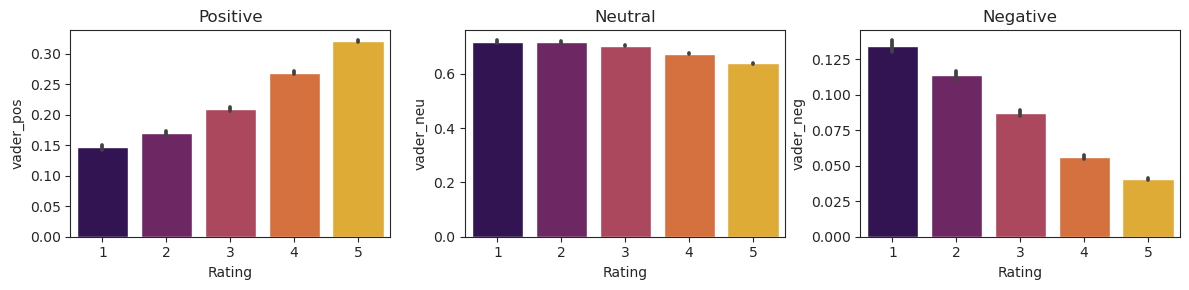

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='vader_pos', ax=axs[0],palette='inferno')
sns.barplot(data=vaders, x='Rating', y='vader_neu', ax=axs[1],palette='inferno')
sns.barplot(data=vaders, x='Rating', y='vader_neg', ax=axs[2],palette='inferno')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

**Discussion** \
There are some wrong classification (some low rating reviews are categorized as positive, and vice versa). 

One thing to note is that this model just look at each word in the sentences and score each word individualy. Therefore, bad wordings in the review but using positive words might have been misinterprated by the vader, and vice versa, thus wrong sentiment classification.

## Model 2: RoBERTa

trained on twitter dataset for sentiment analysis (take into account relation between words, can identify some slangs)

In [44]:
!pip install tokenizers

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [45]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [46]:
#check whether GPU is available already
import torch

# Check if a GPU is available
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU is available')
else:
    device = torch.device('cpu')
    print('GPU is not available')

GPU is available


In [47]:
torch.cuda.empty_cache()
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.to('cuda:0')

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [48]:
def roberta_score(text):
    text = text[:2500]
    encoded_text = tokenizer(text, return_tensors='pt')
    encoded_text.to('cuda:0')
    output = model(**encoded_text)
    scores = output[0][0].detach().cpu().numpy()
    scores = softmax(scores)
    pred_check = scores[:3]
    
    for i in range(len(pred_check)):
        if pred_check[i] == max(pred_check):
            if i == 0:
                roberta_pred = 'negative'
            if i == 1:
                roberta_pred = 'neutral'
            if i == 2:
                roberta_pred = 'positive'
            
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2],
        'roberta_pred': roberta_pred
    }
    return scores_dict


In [49]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['cleaned_text']
    myid = row['Review_ID']
    
    roberta_result = roberta_score(text)
    res[myid] = roberta_result

  0%|          | 0/40023 [00:00<?, ?it/s]

**Discussion**\
Errors for some Review IDs are due to incompatible size thus were not able to run through the RoBERTa model\
Character length of reviews are shortened to 2500 characters to ensure that the token generated will not exceed dimension of [1,514]

In [50]:
combined_df = pd.DataFrame(res).T
combined_df = combined_df.reset_index().rename(columns={'index': 'Review_ID'})
combined_df = combined_df.merge(vaders, how='left')

In [51]:
combined_df.columns

Index(['Review_ID', 'roberta_neg', 'roberta_neu', 'roberta_pos',
       'roberta_pred', 'vader_neg', 'vader_neu', 'vader_pos', 'compound',
       'vader_pred', 'Rating', 'Reviewer_Location', 'Review_Text', 'Branch',
       'year', 'month', 'cleaned_text', 'review_length', 'true_sentiment'],
      dtype='object')

## Model 3: Hugging Face Transformers (DistilBERT)

only classify either positive or negative, will not classify neutral

In [64]:
from transformers import pipeline, DistilBertTokenizer, DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model.to('cuda:0')

classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, device = 0)

In [65]:
#check whether GPU is available already
import torch

# Check if a GPU is available
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU is available')
else:
    device = torch.device('cpu')
    print('GPU is not available')

GPU is available


In [66]:
classifier("I am going to school")[0]

{'label': 'POSITIVE', 'score': 0.989225447177887}

In [67]:
yuhu = {}
my_dict = {"name": "Alice", "age": 30, "location": "New York"}
test = {**my_dict}
yuhu["haha"] = test
ommo_df = pd.DataFrame(yuhu).T
ommo_df

,age,location,name
haha,30,New York,Alice


In [68]:
def classification_hugging_face(text):
    text = text[:2500]
    encoded_text = tokenizer(text, return_tensors='pt')
    encoded_text.to('cuda:0')
    output = model(**encoded_text)
    scores = output[0][0].detach().cpu().numpy()
    score = classifier(text)[0]['score']
    label = classifier(text)[0]['label'].lower()

    scores_dict = {
        'transformers_score' : score,
        'transformers_pred'  : label,
    }
    return scores_dict

In [69]:
# run Hugging Face transformers
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['cleaned_text']
        myid = row['Review_ID']
        res[myid] = classification_hugging_face(text)
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/40023 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/transformers/pipelines/base.py:1015: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,
Token indices sequence length is longer than the specified maximum sequence length for this model (514 > 512). Running this sequence through the model will result in indexing errors


Broke for id 573139508


In [70]:
final_df = pd.DataFrame(res).T
final_df = final_df.reset_index().rename(columns={'index': 'Review_ID'})
final_df = final_df.merge(combined_df, how='left')
final_df.head()

,Review_ID,transformers_score,transformers_pred,roberta_neg,roberta_neu,roberta_pos,roberta_pred,vader_neg,vader_neu,vader_pos,...,vader_pred,Rating,Reviewer_Location,Review_Text,Branch,year,month,cleaned_text,review_length,true_sentiment
0,670772142,0.99939,positive,0.003827,0.052696,0.943476,positive,0.0,0.79,0.21,...,neutral,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4,youve ever disneyland anywhere youll find disn...,62,positive
1,670682799,0.507891,negative,0.023909,0.17886,0.797231,positive,0.029,0.678,0.293,...,neutral,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5,since last time visit hk disneyland yet time s...,171,positive
2,670623270,0.61941,positive,0.008538,0.035421,0.956041,positive,0.022,0.641,0.337,...,neutral,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4,thanks god hot humid visiting park otherwise w...,179,positive
3,670607911,0.997715,negative,0.195695,0.399861,0.404444,positive,0.102,0.628,0.271,...,neutral,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4,hk disneyland great compact park unfortunately...,91,positive
4,670607296,0.998925,positive,0.008447,0.239948,0.751605,positive,0.0,0.777,0.223,...,neutral,4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4,location city took around 1 hour kowlon kids l...,33,positive


In [71]:
final_df.columns

Index(['Review_ID', 'transformers_score', 'transformers_pred', 'roberta_neg',
       'roberta_neu', 'roberta_pos', 'roberta_pred', 'vader_neg', 'vader_neu',
       'vader_pos', 'compound', 'vader_pred', 'Rating', 'Reviewer_Location',
       'Review_Text', 'Branch', 'year', 'month', 'cleaned_text',
       'review_length', 'true_sentiment'],
      dtype='object')

In [72]:
# save dataframe in form of csv for further viz in Tableau
final_df.to_csv("disneyland.csv", index=False)

## 5) Model Comparison

In [73]:
from sklearn.metrics import accuracy_score

### NLTK Vader

In [74]:
vader = final_df['vader_pred']
true_labels = final_df['true_sentiment']

accuracy = accuracy_score(true_labels, vader)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.20


### RoBERTa

In [75]:
roberta = final_df['roberta_pred']
true_labels = final_df['true_sentiment']

accuracy = accuracy_score(true_labels, roberta)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.78


### Transformers

In [76]:
transformers = final_df['transformers_pred']
true_labels = final_df['true_sentiment']

accuracy = accuracy_score(true_labels, transformers)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.61


**Discussion** \
RoBERTa has the highest accuracy, followed by Transformers, and lastly NLTK vader with the lowest accuracy.\
A possible reason for the low sentiment performance could be due to word reduction (to match the tensor size), resulting in inaccurate prediction in some of the data.

One possible explanation for NLTK Vader's poor performance is that the model ignores the relationship between words (it only analyse on tokens basis). Connections between words are important in real life because humans communicate in context. This would disadvantage NLTK Vader, resulting in low accuracy.

RoBERTa, on the other hand, was trained on the BooksCorpus, English Wikipedia, and CC-News, which each is a large corpus and have a variety of tone and writing styles, allowing RoBERTa to be robust and perform well.

Lastly, DistilBERT, was trained on the same corpus as RoBERTa, but it employs a smaller architecture and a technique known as knowledge distillation to make it more computationally efficient. This distillation could be the reason for RoBERTa's slightly lower performance.